<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D1%81%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Алгоритмы снижения размерности с использованием Autoencoders

## Введение

Снижение размерности — это процесс преобразования данных из высокоразмерного пространства в низкоразмерное пространство таким образом, чтобы сохранить значимую информацию. Это особенно важно для больших наборов данных, где обработка всех признаков может быть вычислительно затратной или привести к переобучению моделей машинного обучения.

Autoencoder (автокодировщик) — это тип нейронной сети, которая автоматически обучается сжимать данные до меньшей размерности и восстанавливать их обратно. В этой лекции мы рассмотрим:

1. **Математическую основу autoencoder'ов**.
2. **Архитектурные особенности**.
3. **Процесс обучения**.
4. **Различные типы autoencoder'ов**.
5. **Примеры применения**.


## 1. Математическая основа Autoencoder'ов

### 1.1. Общая идея
Autoencoder состоит из двух компонентов:
- **Кодировщик (Encoder)**: Преобразует входные данные $x \in \mathbb{R}^d$ в скрытое представление $z \in \mathbb{R}^k$, где $k < d$.
- **Декодировщик (Decoder)**: Восстанавливает исходные данные $\hat{x} \in \mathbb{R}^d$ из скрытого представления $z$.

Цель — минимизировать разницу между входными данными $x$ и восстановленными данными $\hat{x}$.

### 1.2. Формальная запись
Пусть:
- $x \in \mathbb{R}^d$ — входные данные,
- $z \in \mathbb{R}^k$ — скрытое представление ($k < d$),
- $\hat{x} \in \mathbb{R}^d$ — восстановленные данные.

Тогда:
- Кодировщик: $z = f(x; \theta_e)$,
- Декодировщик: $\hat{x} = g(z; \theta_d)$,

где:
- $f$ и $g$ — нелинейные функции, реализованные через нейронные сети,
- $\theta_e$ и $\theta_d$ — параметры кодировщика и декодировщика соответственно.

### 1.3. Целевая функция


Цель обучения autoencoder'а — минимизировать разницу между входными данными $x$ и восстановленными данными $\hat{x}$. Для этого используется функция потерь, которая измеряет эту разницу. Наиболее распространённой функцией потерь является **среднеквадратическая ошибка (MSE)**:

$$
L(x, \hat{x}) = \| x - \hat{x} \|^2 = \sum_{i=1}^d (x_i - \hat{x}_i)^2
$$

где:
- $x_i$ — значение $i$-го признака входных данных,
- $\hat{x}_i$ — значение $i$-го признака восстановленных данных,
- $d$ — размерность входных данных.

Функция потерь можно интерпретировать как меру того, насколько хорошо модель восстанавливает исходные данные после сжатия в скрытое представление.

#### Обобщённая целевая функция
В случае, если мы работаем с батчем данных (множеством примеров), целевая функция принимает вид:

$$
\mathcal{L}(\theta_e, \theta_d) = \frac{1}{N} \sum_{n=1}^N \| x^{(n)} - \hat{x}^{(n)} \|^2
$$

где:
- $N$ — количество примеров в батче,
- $x^{(n)}$ — $n$-й пример входных данных,
- $\hat{x}^{(n)} = g(f(x^{(n)}; \theta_e); \theta_d)$ — восстановленный $n$-й пример.

Обучение заключается в минимизации этой функции по параметрам кодировщика ($\theta_e$) и декодировщика ($\theta_d$):

$$
\min_{\theta_e, \theta_d} \mathcal{L}(\theta_e, \theta_d)
$$



## 2. Архитектура Autoencoder'а

### 2.1. Простой Autoencoder
Наиболее базовая архитектура autoencoder'а выглядит так:

#### Кодировщик:
$$
z = f(x; \theta_e) = \sigma(W_e x + b_e)
$$

Где:
- $W_e \in \mathbb{R}^{k \times d}$ — весовая матрица кодировщика,
- $b_e \in \mathbb{R}^k$ — смещение кодировщика,
- $\sigma$ — нелинейная функция активации (например, ReLU, sigmoid).

#### Декодировщик:
$$
\hat{x} = g(z; \theta_d) = \sigma(W_d z + b_d)
$$

Где:
- $W_d \in \mathbb{R}^{d \times k}$ — весовая матрица декодировщика,
- $b_d \in \mathbb{R}^d$ — смещение декодировщика.

### 2.2. Скрытый слой (Bottleneck)
Скрытый слой — это "узкое место" сети, где происходит фактическое снижение размерности. Размерность скрытого слоя определяет, насколько сильно мы хотим сжать данные.


## 3. Процесс обучения


Для минимизации целевой функции используется метод градиентного спуска. Процесс состоит из двух основных шагов:
1. **Вычисление градиента**: Определение, как изменяются параметры модели ($\theta_e$ и $\theta_d$) относительно функции потерь.
2. **Обновление параметров**: Корректировка параметров в направлении, противоположном градиенту.

#### 3.1. Градиент функции потерь
Пусть функция потерь для одного примера имеет вид:

$$
L(x, \hat{x}) = \| x - \hat{x} \|^2
$$

Тогда её градиент по параметрам декодировщика ($\theta_d$) вычисляется как:

$$
\nabla_{\theta_d} L = \nabla_{\theta_d} \| x - \hat{x} \|^2 = -2 \cdot (x - \hat{x}) \cdot \nabla_{\theta_d} \hat{x}
$$

Здесь $\nabla_{\theta_d} \hat{x}$ — это производная выхода декодировщика по его параметрам. Она вычисляется через цепное правило дифференцирования.

Аналогично, градиент по параметрам кодировщика ($\theta_e$) вычисляется как:

$$
\nabla_{\theta_e} L = \nabla_{\theta_e} \| x - \hat{x} \|^2 = -2 \cdot (x - \hat{x}) \cdot \nabla_{z} \hat{x} \cdot \nabla_{\theta_e} z
$$

Здесь:
- $\nabla_{z} \hat{x}$ — производная выхода декодировщика по входу ($z$),
- $\nabla_{\theta_e} z$ — производная выхода кодировщика по его параметрам.

#### 3.2. Бэкпропагация
Бэкпропагация — это алгоритм автоматического дифференцирования, который позволяет эффективно вычислять градиенты для всех параметров модели. Процесс происходит в следующем порядке:
1. **Прямой проход (forward pass)**: Вычисляются значения на каждом слое сети для данного примера.
   - Кодировщик преобразует входные данные $x$ в скрытое представление $z = f(x; \theta_e)$.
   - Декодировщик восстанавливает данные $\hat{x} = g(z; \theta_d)$.
2. **Обратный проход (backward pass)**: Вычисляются градиенты функции потерь относительно параметров модели.
   - Сначала вычисляется градиент по выходу декодировщика ($\nabla_{\hat{x}} L$).
   - Затем этот градиент передаётся назад через декодировщик ($\nabla_{z} L$).
   - Наконец, градиент передаётся через кодировщик ($\nabla_{x} L$).

#### Пример вычисления градиента для простого autoencoder'а
Рассмотрим простой autoencoder с линейным кодировщиком и декодировщиком:

- Кодировщик: $z = W_e x + b_e$,
- Декодировщик: $\hat{x} = W_d z + b_d$.

Функция потерь:

$$
L(x, \hat{x}) = \| x - \hat{x} \|^2 = \| x - (W_d (W_e x + b_e) + b_d) \|^2
$$

Градиент по параметрам декодировщика:

$$
\nabla_{W_d} L = -2 \cdot (x - \hat{x}) \cdot z^\top
$$

$$
\nabla_{b_d} L = -2 \cdot (x - \hat{x})
$$

Градиент по параметрам кодировщика:

$$
\nabla_{W_e} L = -2 \cdot (x - \hat{x}) \cdot W_d^\top \cdot x^\top
$$

$$
\nabla_{b_e} L = -2 \cdot (x - \hat{x}) \cdot W_d^\top
$$

Эти градиенты используются для обновления параметров:

$$
W_d \leftarrow W_d - \eta \nabla_{W_d} L, \quad b_d \leftarrow b_d - \eta \nabla_{b_d} L
$$

$$
W_e \leftarrow W_e - \eta \nabla_{W_e} L, \quad b_e \leftarrow b_e - \eta \nabla_{b_e} L
$$

где $\eta$ — скорость обучения.



### 4. Регуляризация и дополнительные термы в функции потерь

В некоторых случаях к целевой функции добавляют дополнительные регуляризационные термы, чтобы улучшить качество модели. Например:
- **Разреженный autoencoder**: Штраф за активацию скрытых нейронов:

$$
L(x, \hat{x}) + \lambda R(\text{activation})
$$

где $R(\text{activation})$ может быть Kullback-Leibler дивергенцией между желаемым уровнем активации и фактическим.

- **Denoising autoencoder**: Используется шумная версия входных данных $x'$ вместо чистых данных $x$, что меняет формулу для функции потерь:

$$
L(x', \hat{x}) = \| x - \hat{x} \|^2
$$



## 5. Типы Autoencoder'ов

### 5.1. Простой Autoencoder
Это базовый тип autoencoder'а, который минимизирует только ошибку восстановления. Он подходит для задач, где нужно просто снизить размерность данных.

### 5.2. Разреженный Autoencoder
В разреженных autoencoder'ах добавляется ограничение на активацию скрытых нейронов. Это заставляет модель использовать только часть нейронов в скрытом слое, что делает представление более разреженным и информативным.

Функция потерь для разреженного autoencoder'а выглядит так:

$$
L(x, \hat{x}) + \lambda R(\text{activation})
$$

где $R(\text{activation})$ — регуляризатор, который штрафует активацию скрытых нейронов.

### 5.3. Сверточный Autoencoder
Сверточный autoencoder использует сверточные слои вместо полносвязных. Это особенно полезно для обработки изображений, так как сверточные слои эффективно извлекают пространственные признаки.

#### Архитектура:
- **Кодировщик**: Состоит из сверточных слоев, которые уменьшают пространственную размерность данных.
- **Декодировщик**: Состоит из транспонированных сверточных слоев, которые увеличивают пространственную размерность данных.

### 5.4. Denoising Autoencoder
Denoising autoencoder обучается восстанавливать чистые данные из шумных. Для этого на вход подаются шумные версии данных, а модель обучается минимизировать ошибку восстановления чистых данных.



## 6. Применение Autoencoder'ов для снижения размерности

### 6.1. Как работает снижение размерности?
1. **Обучение модели**: Autoencoder обучается на данных, чтобы минимизировать ошибку восстановления.
2. **Извлечение скрытого представления**: После обучения кодировщик используется для преобразования входных данных в скрытое представление меньшей размерности.

Например, если у нас есть набор данных размерности $10,000$, а размерность скрытого слоя равна $50$, то каждый объект данных будет представлен вектором размерности $50$.

### 6.2. Преимущества использования Autoencoder'ов для снижения размерности
1. **Нелинейное преобразование**: Autoencoder может находить сложные нелинейные зависимости между признаками.
2. **Автоматическое обучение**: Нет необходимости предварительно выбирать функции для преобразования данных.
3. **Обработка различных типов данных**: Autoencoder можно адаптировать для работы с изображениями, текстом, временными рядами и другими типами данных.



Давайте разберем конкретный числовой пример обучения простого autoencoder'а. Мы будем использовать toy-данные для демонстрации работы модели.



### Задача: Снижение размерности данных

#### Исходные данные
Пусть у нас есть два входных вектора размерности $d = 3$:
$$
x^{(1)} = [1, 2, 3], \quad x^{(2)} = [4, 5, 6]
$$

Мы хотим сжать эти данные до размерности $k = 2$, то есть получить скрытое представление $z \in \mathbb{R}^2$.


### Архитектура Autoencoder'а

#### Кодировщик (Encoder)
$$
z = f(x; \theta_e) = W_e x + b_e
$$
где:
- $W_e \in \mathbb{R}^{2 \times 3}$ — весовая матрица кодировщика,
- $b_e \in \mathbb{R}^2$ — смещение кодировщика.

#### Декодировщик (Decoder)
$$
\hat{x} = g(z; \theta_d) = W_d z + b_d
$$
где:
- $W_d \in \mathbb{R}^{3 \times 2}$ — весовая матрица декодировщика,
- $b_d \in \mathbb{R}^3$ — смещение декодировщика.



### Инициализация параметров
Для простоты инициализируем параметры случайными значениями:
- $W_e = \begin{bmatrix} 0.1 & 0.2 & 0.3 \\ 0.4 & 0.5 & 0.6 \end{bmatrix}$,
- $b_e = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$,
- $W_d = \begin{bmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \\ 1.1 & 1.2 \end{bmatrix}$,
- $b_d = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix}$.


### Прямой проход (Forward Pass)

#### Шаг 1: Кодирование первого примера ($x^{(1)} = [1, 2, 3]$)
$$
z^{(1)} = W_e x^{(1)} + b_e
$$
$$
z^{(1)} = \begin{bmatrix} 0.1 & 0.2 & 0.3 \\ 0.4 & 0.5 & 0.6 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}
$$
$$
z^{(1)} = \begin{bmatrix} 0.1 \cdot 1 + 0.2 \cdot 2 + 0.3 \cdot 3 \\ 0.4 \cdot 1 + 0.5 \cdot 2 + 0.6 \cdot 3 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}
$$
$$
z^{(1)} = \begin{bmatrix} 1.4 \\ 3.2 \end{bmatrix}
$$

#### Шаг 2: Декодирование первого примера
$$
\hat{x}^{(1)} = W_d z^{(1)} + b_d
$$
$$
\hat{x}^{(1)} = \begin{bmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \\ 1.1 & 1.2 \end{bmatrix} \cdot \begin{bmatrix} 1.4 \\ 3.2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix}
$$
$$
\hat{x}^{(1)} = \begin{bmatrix} 0.7 \cdot 1.4 + 0.8 \cdot 3.2 \\ 0.9 \cdot 1.4 + 1.0 \cdot 3.2 \\ 1.1 \cdot 1.4 + 1.2 \cdot 3.2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix}
$$
$$
\hat{x}^{(1)} = \begin{bmatrix} 3.3 \\ 4.46 \\ 5.62 \end{bmatrix}
$$



### Вычисление функции потерь

Используем среднеквадратическую ошибку (MSE):
$$
L(x^{(1)}, \hat{x}^{(1)}) = \| x^{(1)} - \hat{x}^{(1)} \|^2
$$
$$
L(x^{(1)}, \hat{x}^{(1)}) = \sum_{i=1}^3 (x_i^{(1)} - \hat{x}_i^{(1)})^2
$$
$$
L(x^{(1)}, \hat{x}^{(1)}) = (1 - 3.3)^2 + (2 - 4.46)^2 + (3 - 5.62)^2
$$
$$
L(x^{(1)}, \hat{x}^{(1)}) = (-2.3)^2 + (-2.46)^2 + (-2.62)^2
$$
$$
L(x^{(1)}, \hat{x}^{(1)}) = 5.29 + 6.0516 + 6.8644 = 18.206
$$


### Обратный проход (Backward Pass)

#### Градиент функции потерь
Вычислим градиент по параметрам декодировщика ($W_d, b_d$) и кодировщика ($W_e, b_e$).

1. **Градиент по $\hat{x}^{(1)}$:**
$$
\nabla_{\hat{x}^{(1)}} L = -2 \cdot (x^{(1)} - \hat{x}^{(1)})
$$
$$
\nabla_{\hat{x}^{(1)}} L = -2 \cdot \begin{bmatrix} 1 - 3.3 \\ 2 - 4.46 \\ 3 - 5.62 \end{bmatrix} = -2 \cdot \begin{bmatrix} -2.3 \\ -2.46 \\ -2.62 \end{bmatrix}
$$
$$
\nabla_{\hat{x}^{(1)}} L = \begin{bmatrix} 4.6 \\ 4.92 \\ 5.24 \end{bmatrix}
$$

2. **Градиент по $W_d$:**
$$
\nabla_{W_d} L = \nabla_{\hat{x}^{(1)}} L \cdot (z^{(1)})^\top
$$
$$
\nabla_{W_d} L = \begin{bmatrix} 4.6 \\ 4.92 \\ 5.24 \end{bmatrix} \cdot \begin{bmatrix} 1.4 & 3.2 \end{bmatrix}
$$
$$
\nabla_{W_d} L = \begin{bmatrix} 4.6 \cdot 1.4 & 4.6 \cdot 3.2 \\ 4.92 \cdot 1.4 & 4.92 \cdot 3.2 \\ 5.24 \cdot 1.4 & 5.24 \cdot 3.2 \end{bmatrix}
$$
$$
\nabla_{W_d} L = \begin{bmatrix} 6.44 & 14.72 \\ 6.888 & 15.744 \\ 7.336 & 16.768 \end{bmatrix}
$$

3. **Градиент по $b_d$:**
$$
\nabla_{b_d} L = \nabla_{\hat{x}^{(1)}} L = \begin{bmatrix} 4.6 \\ 4.92 \\ 5.24 \end{bmatrix}
$$

4. **Градиент по $W_e$:**
$$
\nabla_{W_e} L = (\nabla_{\hat{x}^{(1)}} L)^\top \cdot W_d \cdot x^{(1)\top}
$$

Этот шаг требует дополнительных вычислений, но идея аналогична предыдущим шагам.



### Обновление параметров

Обновляем параметры с использованием градиентного спуска:
$$
W_d \leftarrow W_d - \eta \nabla_{W_d} L, \quad b_d \leftarrow b_d - \eta \nabla_{b_d} L
$$
$$
W_e \leftarrow W_e - \eta \nabla_{W_e} L, \quad b_e \leftarrow b_e - \eta \nabla_{b_e} L
$$

где $\eta$ — скорость обучения.


### Заключение

В этом примере мы продемонстрировали, как работает простой autoencoder:
1. Кодировка входных данных в скрытое представление.
2. Декодировка скрытого представления обратно в исходное пространство.
3. Вычисление функции потерь и градиентов.
4. Обновление параметров модели.

Этот процесс повторяется для всех примеров в наборе данных, пока модель не научится минимизировать ошибку восстановления.

$\boxed{\text{Конец примера.}}$


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

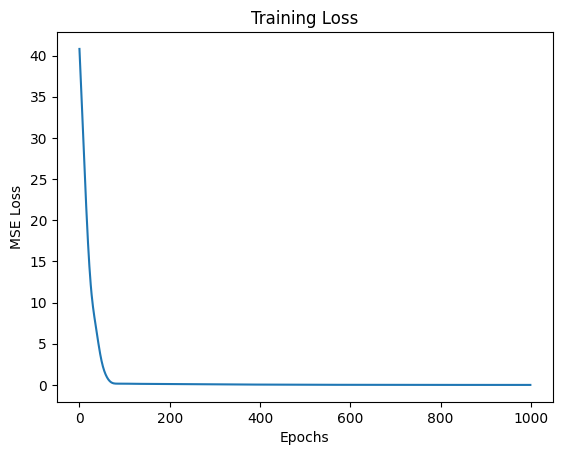

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


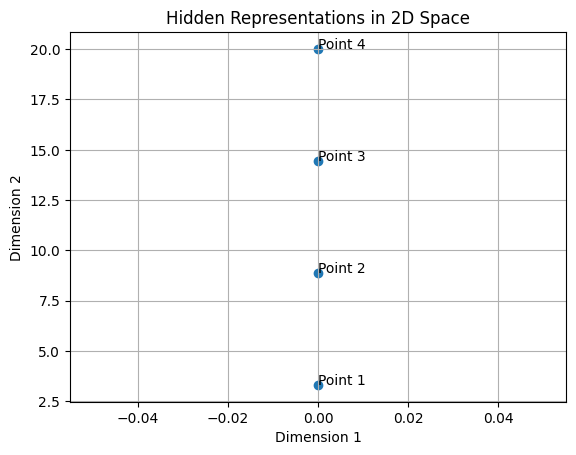

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Original Data:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]

Reconstructed Data:
[[ 1.0089391  2.056457   2.9509888]
 [ 4.004623   5.029101   5.9746532]
 [ 7.000308   8.001745   8.998321 ]
 [ 9.995991  10.974388  12.021984 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Генерация toy-данных
np.random.seed(42)
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=np.float32)

# Параметры модели
input_dim = data.shape[1]  # Размерность входных данных (3)
encoding_dim = 2           # Размерность скрытого представления (2)

# Архитектура Autoencoder'а
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)  # Кодировщик
decoded = Dense(input_dim, activation='linear')(encoded)       # Декодировщик

# Создание модели
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Вывод структуры модели
autoencoder.summary()

# Обучение модели
history = autoencoder.fit(data, data, epochs=1000, batch_size=4, verbose=0)

# Визуализация процесса обучения
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

# Извлечение кодировщика
encoder = Model(input_layer, encoded)

# Получение скрытых представлений
hidden_representations = encoder.predict(data)

# Визуализация скрытых представлений
plt.scatter(hidden_representations[:, 0], hidden_representations[:, 1])
for i, point in enumerate(hidden_representations):
    plt.text(point[0], point[1], f'Point {i+1}', fontsize=10)
plt.title('Hidden Representations in 2D Space')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# Восстановление данных
reconstructed_data = autoencoder.predict(data)

# Вывод исходных и восстановленных данных
print("Original Data:")
print(data)
print("\nReconstructed Data:")
print(reconstructed_data)